# 4. Re-run the original model with log-differenced updated data
(PPP-adjusted)

In [3]:
from IPython.display import display, HTML
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set(style='ticks', rc={'axes.grid':True,
                           'xtick.labelsize': 'medium',
                           'ytick.labelsize': 'medium',
#                            'font.size': 15,
                          })

analysis_dir = os.getcwd()
assert analysis_dir.endswith(os.path.join('em-2020','analysis'))
plot_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'tex', 'plots'))
data_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'data'))

In [4]:
suppressMessages({
library(lavaan)
library(semPlot)
library(semTools)
library(MVN)
library(Hmisc)
library(data.table)
library(dplyr)
library(tseries)
})

In [5]:
%get data_dir --from em-2020
cols <- c('year', 'ISG', 'TO', 'TI', 'P_GDPb', 'EIb')
data.raw <- read.csv(file.path(data_dir, 'WB_BGD_current.csv'))[cols]

log_cols <- c('EIb', 'P_GDPb', 'TI')
data.log <- copy(data.raw)
data.log[log_cols] <- log(data.raw[log_cols])
data.logdiff <- cbind(data.raw[-1,'year', drop=FALSE], diff(as.matrix(subset(data.log, select=-year))))

data <- subset(data.raw, year >= 1990 & year <= 2015)
data.log <- subset(data.log, year >= 1990 & year <= 2015)
data.logdiff <- subset(data.logdiff, year >= 1990 & year <= 2015)

data.logdiff

,year,ISG,TO,TI,P_GDPb,EIb
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31,1990,0.358918934,0.64132799,0.000000000,NA,NA
32,1991,0.973878700,-0.07667513,0.045256592,0.04426397,-0.081929018
33,1992,0.598385998,1.04417862,0.354016546,0.05320042,-0.021506640
34,1993,1.216365518,3.18757757,-0.408575531,0.04777324,-0.015132773
35,1994,0.535736376,-0.25571852,0.179201429,0.03789186,-0.015803917
36,1995,0.110832024,5.34363152,0.568504735,0.04935107,0.013633404
37,1996,-1.896907879,-2.13340835,-0.390097078,0.04107603,-0.056474572
38,1997,0.178753522,0.24942567,0.075507553,0.03990177,-0.017336717
39,1998,0.798072276,1.55455001,0.269332934,0.04089365,-0.020070144


In [6]:
summary(lm('TI ~ ISG', data=data.logdiff))


Call:
lm(formula = "TI ~ ISG", data = data.logdiff)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48927 -0.08397 -0.00542  0.10014  0.53059 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.03362    0.04472   0.752    0.459
ISG          0.03869    0.06921   0.559    0.581

Residual standard error: 0.207 on 24 degrees of freedom
Multiple R-squared:  0.01286,	Adjusted R-squared:  -0.02828 
F-statistic: 0.3126 on 1 and 24 DF,  p-value: 0.5813


[1] 0.001404828


Call:
lm(formula = "EIb ~ ISG", data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.052488 -0.018330  0.000001  0.013820  0.047990 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.950e-02  5.694e-03  -5.181 3.41e-05 ***
ISG          5.684e-05  8.626e-03   0.007    0.995    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02569 on 22 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  1.974e-06,	Adjusted R-squared:  -0.04545 
F-statistic: 4.342e-05 on 1 and 22 DF,  p-value: 0.9948


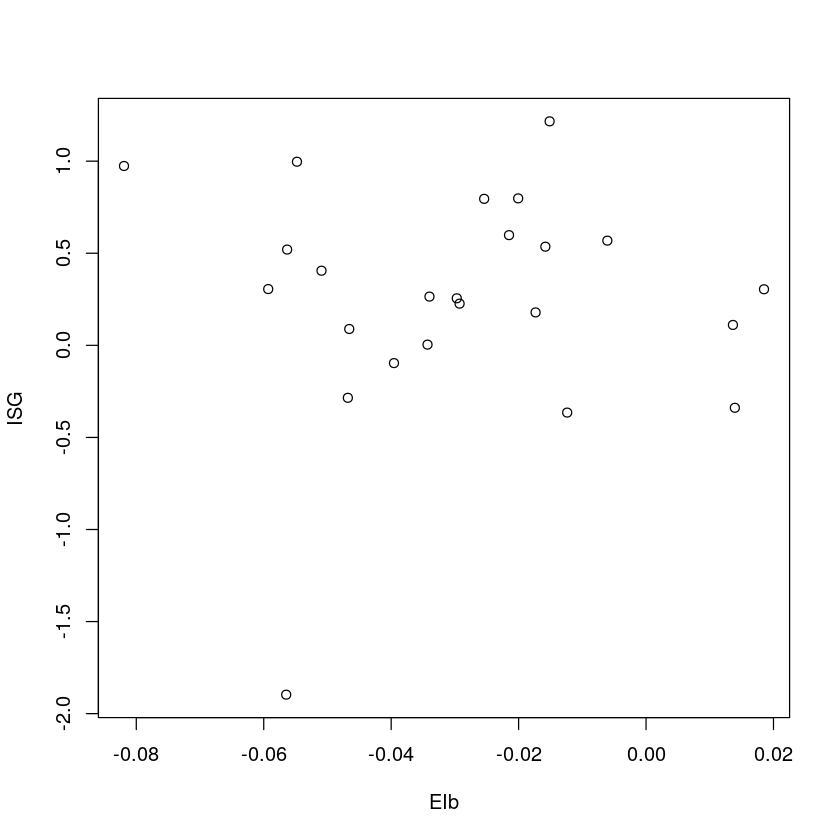

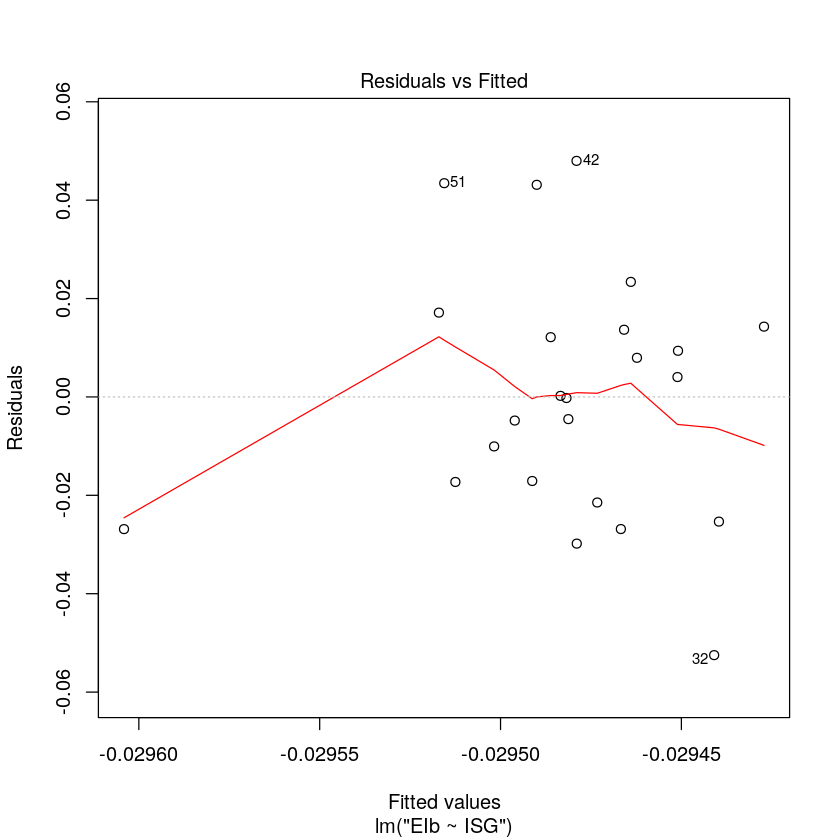

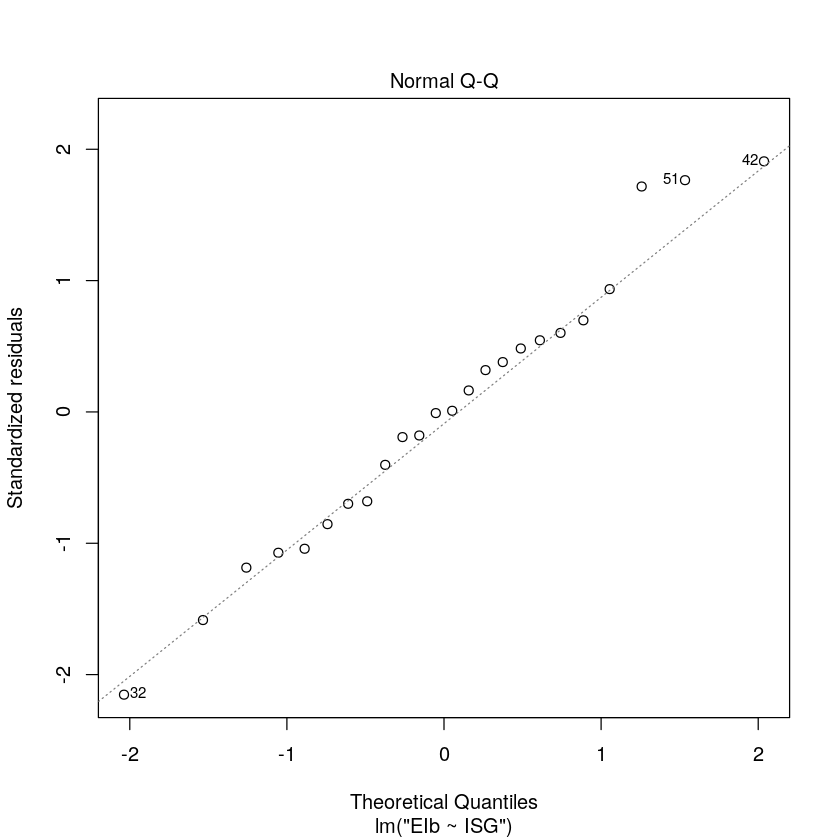

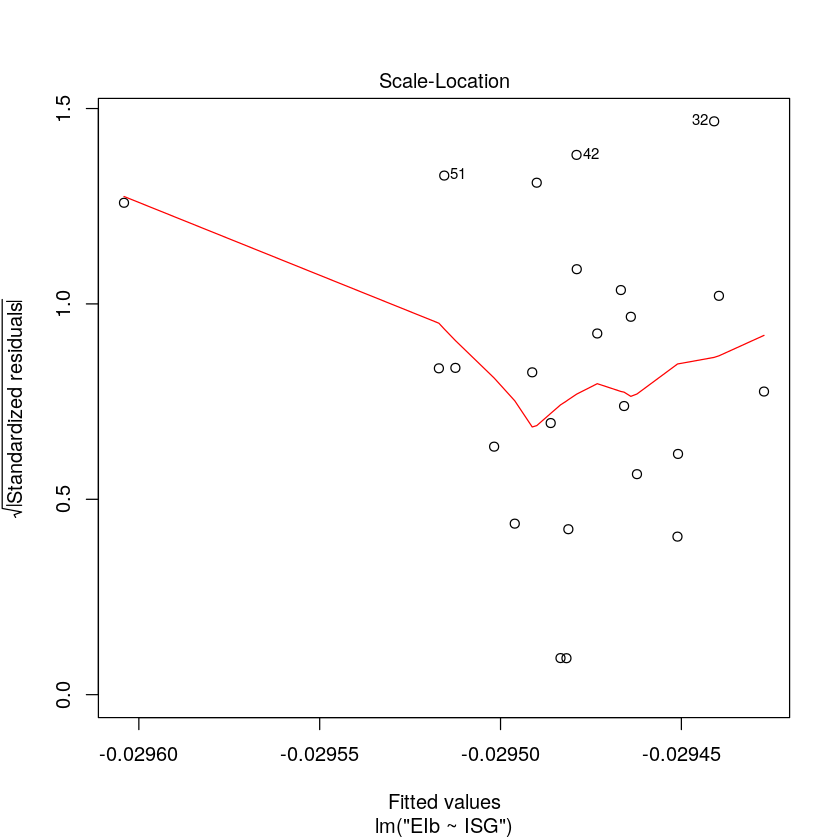

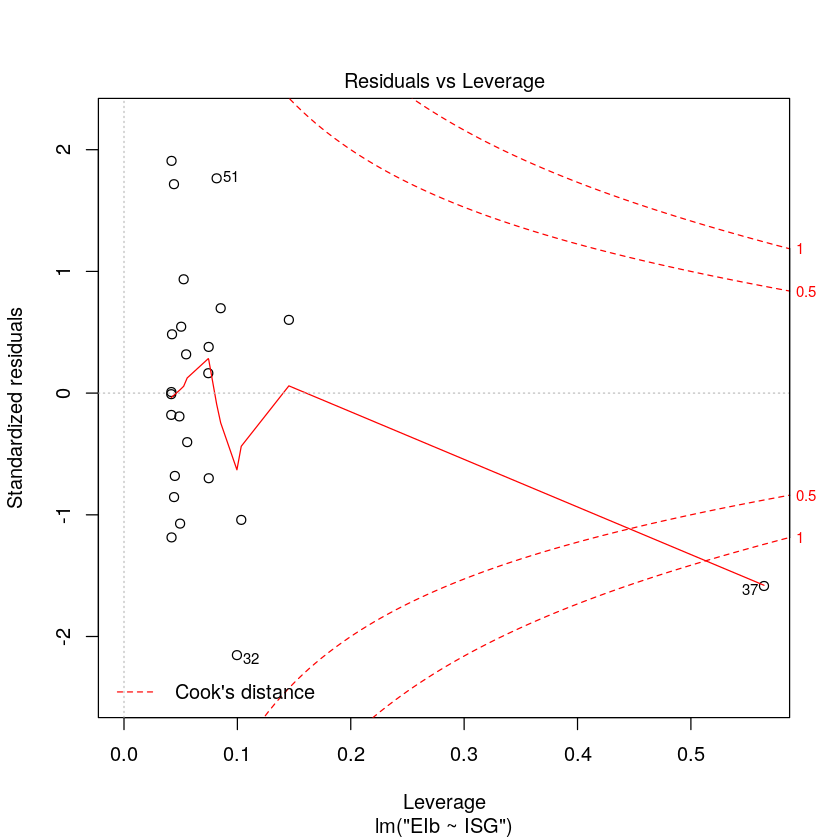

In [39]:
with(data.logdiff, {plot(EIb, ISG); cor(EIb, ISG, use='pairwise.complete.obs')})
summary(lm('EIb ~ ISG', data=data.logdiff))
plot(lm('EIb ~ ISG', data=data.logdiff))

In [8]:
summary(lm('P_GDPb ~ TO', data=data.logdiff))


Call:
lm(formula = "P_GDPb ~ TO", data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.015948 -0.012304 -0.002614  0.010253  0.025051 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0537131  0.0027073  19.840 5.76e-16 ***
TO          0.0020126  0.0008299   2.425   0.0236 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01298 on 23 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2036,	Adjusted R-squared:  0.169 
F-statistic: 5.881 on 1 and 23 DF,  p-value: 0.02356


In [9]:
summary(lm('EIb ~ ISG + TO + TI + P_GDPb', data=data.logdiff))


Call:
lm(formula = "EIb ~ ISG + TO + TI + P_GDPb", data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.057370 -0.014397 -0.000563  0.014938  0.048453 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0047019  0.0239286  -0.196    0.846
ISG          0.0004422  0.0089744   0.049    0.961
TO           0.0007217  0.0020045   0.360    0.723
TI           0.0267926  0.0263886   1.015    0.323
P_GDPb      -0.4844747  0.4390350  -1.103    0.284

Residual standard error: 0.02575 on 19 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1324,	Adjusted R-squared:  -0.05027 
F-statistic: 0.7248 on 4 and 19 DF,  p-value: 0.5858


In [10]:
model.path <- '
## path model
EIb ~ p_eib_isg*ISG + p_eib_to*TO + p_eib_ti*TI + p_eib_pgdpb*P_GDPb
TI ~ p_ti_isg*ISG
P_GDPb ~ p_pgdpb_to*TO
## indirect effect
p_eib_ti_isg := p_eib_ti*p_ti_isg
p_eib_pgdpb_to := p_eib_pgdpb*p_pgdpb_to
## total effect
p_eib_isg_total := p_eib_isg + (p_eib_ti*p_ti_isg)
p_eib_to_total := p_eib_to + (p_eib_pgdpb*p_pgdpb_to)
'

capture <- function(expr, file) {
    writeLines(c('\\begin{verbatim}', 
                 capture.output(expr),
                 '\\end{verbatim}'), con=file)
}
model.path.fit <- sem(model.path, data=data.logdiff, estimator='MLR', missing='ML', meanstructure=TRUE)
summary(model.path.fit, standardized=TRUE, fit.measures=FALSE)

lavaan 0.6-5 ended normally after 52 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         12
                                                      
  Number of observations                            26
  Number of missing patterns                         3
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                                 1.553       1.670
  Degrees of freedom                                 3           3
  P-value (Chi-square)                           0.670       0.644
  Scaling correction factor                                  0.930
    for the Yuan-Bentler correction (Mplus variant) 

Parameter Estimates:

  Information                                      Observed
  Observed information based on                     Hessian
  Standard e

In [11]:
soln.std <- as.data.frame(standardizedSolution(model.path.fit, se=TRUE, type='std.all', remove.def=FALSE))
fit.measures <- as.data.frame(fitMeasures(model.path.fit))
r.square <- lavInspect(model.path.fit, 'rsquare')
n.x <- 3

In [12]:
%get soln.std --from R
%get r.square --from R
%get fit.measures --from R
display(np.round(soln_std, 3))
display(r_square)

Variable soln.std is put to SoS as soln_std
Variable r.square is put to SoS as r_square
Variable fit.measures is put to SoS as fit_measures


,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
0,EIb,~,ISG,0.011,0.210,0.051,0.960,-0.401,0.423
1,EIb,~,TO,0.091,0.197,0.462,0.644,-0.295,0.477
2,EIb,~,TI,0.221,0.180,1.227,0.220,-0.132,0.573
3,EIb,~,P_GDPb,-0.277,0.194,-1.431,0.153,-0.656,0.102
4,TI,~,ISG,0.113,0.305,0.372,0.710,-0.484,0.711
5,P_GDPb,~,TO,0.444,0.115,3.877,0.000,0.220,0.669
6,EIb,~~,EIb,0.889,0.106,8.369,0.000,0.680,1.097
7,TI,~~,TI,0.987,0.069,14.278,0.000,0.852,1.123
8,P_GDPb,~~,P_GDPb,0.803,0.102,7.882,0.000,0.603,1.002
9,ISG,~~,ISG,1.000,0.000,NaN,NaN,1.000,1.000


EIb       0.111469
TI        0.012856
P_GDPb    0.197394
dtype: float64

In [13]:
df = soln_std.query('(lhs != rhs) & (op == "~")').copy()
df.index = np.where(df.op == '~', df.lhs.str.cat([df.op, df.rhs], sep=' '), df.lhs)
df = df.loc[['TI ~ ISG', 'P_GDPb ~ TO', 'EIb ~ ISG', 'EIb ~ TO', 'EIb ~ TI', 'EIb ~ P_GDPb']]
df['Equation'] = ['1', '2', '3', '', '', '']
df['Dep. var.'] = df.lhs.str.replace('P_GDPb', r'P\_GDPb')
df['Ind. var.'] = df.rhs.str.replace('P_GDPb', r'P\_GDPb')
df['Coefficient'] = ('$P_{' + df.lhs + ',' + df.rhs + '}$').str.replace('P_GDPb', r'P\_GDPb')
df['Est. (std.)'] = np.round(df['est.std'],3)
df['S.E. (std.)'] = np.round(df['se'],3)
df['p-value'] = ['{:.3f}'.format(x) if x >= 0.001 else '*' for x in df['pvalue']]
df['$R^{2}$'] = ''
df['$R^{2}$'].iloc[0:3] = ['{:.3f}'.format(x) for x in r_square.loc[['TI', 'P_GDPb', 'EIb']]]
df = df[['Equation', 
         'Dep. var.', 'Ind. var.', 
         'Coefficient', 'Est. (std.)', 'S.E. (std.)', 'p-value', '$R^{2}$']]
display(df)
print(df.to_latex(escape=False, index=False))

/home/drake/.virtualenvs/em-2020/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Equation,Dep. var.,Ind. var.,Coefficient,Est. (std.),S.E. (std.),p-value,$R^{2}$
TI ~ ISG,1,TI,ISG,"$P_{TI,ISG}$",0.113,0.305,0.710,0.013
P_GDPb ~ TO,2,P\_GDPb,TO,"$P_{P\_GDPb,TO}$",0.444,0.115,*,0.197
EIb ~ ISG,3,EIb,ISG,"$P_{EIb,ISG}$",0.011,0.210,0.960,0.111
EIb ~ TO,,EIb,TO,"$P_{EIb,TO}$",0.091,0.197,0.644,
EIb ~ TI,,EIb,TI,"$P_{EIb,TI}$",0.221,0.180,0.220,
EIb ~ P_GDPb,,EIb,P\_GDPb,"$P_{EIb,P\_GDPb}$",-0.277,0.194,0.153,


\begin{tabular}{llllrrll}
\toprule
Equation & Dep. var. & Ind. var. &        Coefficient &  Est. (std.) &  S.E. (std.) & p-value & $R^{2}$ \\
\midrule
       1 &        TI &       ISG &       $P_{TI,ISG}$ &        0.113 &        0.305 &   0.710 &   0.013 \\
       2 &   P\_GDPb &        TO &   $P_{P\_GDPb,TO}$ &        0.444 &        0.115 &       * &   0.197 \\
       3 &       EIb &       ISG &      $P_{EIb,ISG}$ &        0.011 &        0.210 &   0.960 &   0.111 \\
         &       EIb &        TO &       $P_{EIb,TO}$ &        0.091 &        0.197 &   0.644 &         \\
         &       EIb &        TI &       $P_{EIb,TI}$ &        0.221 &        0.180 &   0.220 &         \\
         &       EIb &   P\_GDPb &  $P_{EIb,P\_GDPb}$ &       -0.277 &        0.194 &   0.153 &         \\
\bottomrule
\end{tabular}



In [14]:
df = soln_std.query('(lhs != rhs) & (op in ["~", ":="])').copy()
df.index = np.where(df.op == '~', df.lhs.str.cat([df.op, df.rhs], sep=' '), df.lhs)
display(np.round(df, 3))
out = pd.DataFrame({'Causal variable': ['ISG', 'TO', 'TI', 'P\_GDPb'], 
                    'DE coeff.': np.nan, 'DE s.e.': np.nan, 'DE p-value': np.nan,
                    'IE coeff.': np.nan, 'IE s.e.': np.nan, 'IE p-value': np.nan,
                    'TE coeff.': np.nan, 'TE s.e.': np.nan, 'TE p-value': np.nan})
out.iloc[0:4, 1:4] = df.iloc[0:4, [3,4,6]].values
out.iloc[0:2, 4:7] = df.iloc[6:8, [3,4,6]].values
out.iloc[0:2, 7:10] = df.iloc[8:10, [3,4,6]].values
out.iloc[2:4, 7:10] = df.iloc[2:4, [3,4,6]].values
f3 = lambda x: '{:.3f}'.format(x) if np.isfinite(x) else ''
out.iloc[:, [1,2,4,5,7,8]] = out.iloc[:, [1,2,4,5,7,8]].applymap(f3)
f3p = lambda x: '{:.3f}'.format(x) if x >= 0.001 else '*' if np.isfinite(x) else ''
out.iloc[:, [3,6,9]] = out.iloc[:, [3,6,9]].applymap(f3p)
display(out)
print(out.to_latex(escape=False, index=False))

,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
EIb ~ ISG,EIb,~,ISG,0.011,0.210,0.051,0.960,-0.401,0.423
EIb ~ TO,EIb,~,TO,0.091,0.197,0.462,0.644,-0.295,0.477
EIb ~ TI,EIb,~,TI,0.221,0.180,1.227,0.220,-0.132,0.573
EIb ~ P_GDPb,EIb,~,P_GDPb,-0.277,0.194,-1.431,0.153,-0.656,0.102
TI ~ ISG,TI,~,ISG,0.113,0.305,0.372,0.710,-0.484,0.711
P_GDPb ~ TO,P_GDPb,~,TO,0.444,0.115,3.877,0.000,0.220,0.669
p_eib_ti_isg,p_eib_ti_isg,:=,p_eib_ti*p_ti_isg,0.025,0.079,0.316,0.752,-0.130,0.180
p_eib_pgdpb_to,p_eib_pgdpb_to,:=,p_eib_pgdpb*p_pgdpb_to,-0.123,0.087,-1.407,0.160,-0.295,0.048
p_eib_isg_total,p_eib_isg_total,:=,p_eib_isg+(p_eib_ti*p_ti_isg),0.036,0.238,0.150,0.881,-0.430,0.502
p_eib_to_total,p_eib_to_total,:=,p_eib_to+(p_eib_pgdpb*p_pgdpb_to),-0.032,0.186,-0.171,0.864,-0.397,0.334


,Causal variable,DE coeff.,DE s.e.,DE p-value,IE coeff.,IE s.e.,IE p-value,TE coeff.,TE s.e.,TE p-value
0,ISG,0.011,0.210,0.960,0.025,0.079,0.752,0.036,0.238,0.881
1,TO,0.091,0.197,0.644,-0.123,0.087,0.160,-0.032,0.186,0.864
2,TI,0.221,0.180,0.220,,,,0.221,0.180,0.220
3,P\_GDPb,-0.277,0.194,0.153,,,,-0.277,0.194,0.153


\begin{tabular}{llllllllll}
\toprule
Causal variable & DE coeff. & DE s.e. & DE p-value & IE coeff. & IE s.e. & IE p-value & TE coeff. & TE s.e. & TE p-value \\
\midrule
            ISG &     0.011 &   0.210 &      0.960 &     0.025 &   0.079 &      0.752 &     0.036 &   0.238 &      0.881 \\
             TO &     0.091 &   0.197 &      0.644 &    -0.123 &   0.087 &      0.160 &    -0.032 &   0.186 &      0.864 \\
             TI &     0.221 &   0.180 &      0.220 &           &         &            &     0.221 &   0.180 &      0.220 \\
        P\_GDPb &    -0.277 &   0.194 &      0.153 &           &         &            &    -0.277 &   0.194 &      0.153 \\
\bottomrule
\end{tabular}



In [15]:
fit_table = fit_measures.loc[['pvalue.scaled', 'rmsea.robust', 'cfi.robust', 'srmr']]
fit_table.index = [r'$\chi^2$', 'RMSEA', 'CFI', 'SRMR']
fit_table.columns = ['value']
fit_table['cut-off'] = ['$> 0.05$', '$<0.08$', '$\geq 0.90$', '$<0.08$']
display(np.round(fit_table, 3))
print(np.round(fit_table, 3).to_latex(escape=False))

,value,cut-off
$\chi^2$,0.644,$> 0.05$
RMSEA,0.000,$<0.08$
CFI,1.000,$\geq 0.90$
SRMR,0.043,$<0.08$


\begin{tabular}{lrl}
\toprule
{} &  value &      cut-off \\
\midrule
$\chi^2$ &  0.644 &     $> 0.05$ \\
RMSEA    &  0.000 &      $<0.08$ \\
CFI      &  1.000 &  $\geq 0.90$ \\
SRMR     &  0.043 &      $<0.08$ \\
\bottomrule
\end{tabular}



     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.113341 -0.000925  0.000000  0.007177  0.018185  0.109706 

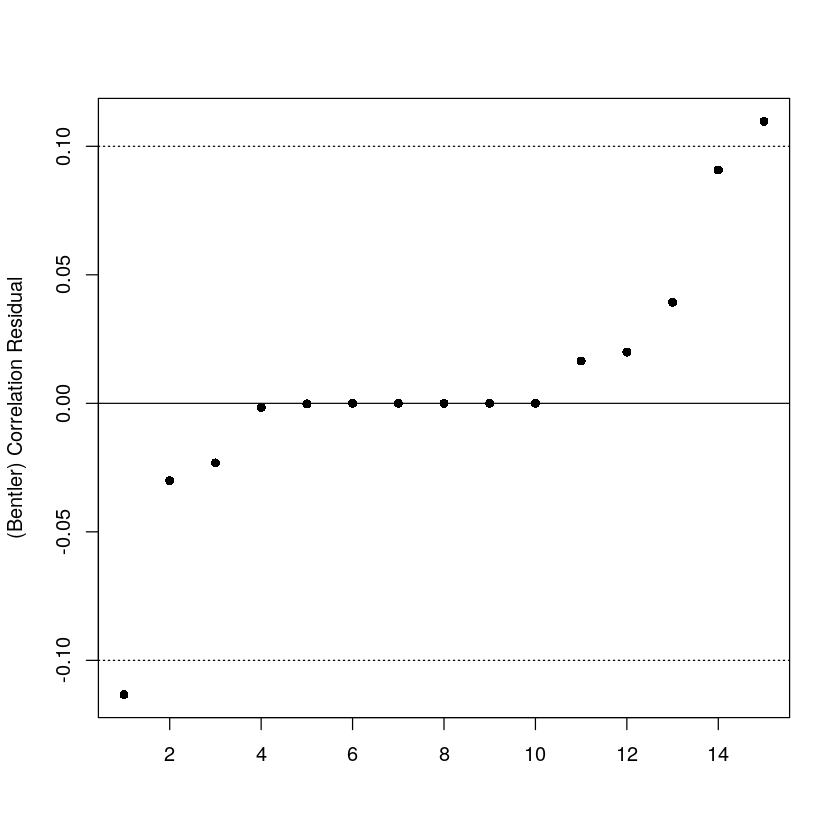

In [16]:
# Extract unique correlation residuals
model.path.fit.resid <- as.data.frame(resid(model.path.fit, type='cor.bentler')$cov)
resid <- model.path.fit.resid[lower.tri(model.path.fit.resid, diag=TRUE)]

summary(resid)

plot(resid[order(resid)], pch=16, xlab='', ylab='(Bentler) Correlation Residual')
abline(h=c(0, -.1, .1), lty=c(1,3,3))

In [17]:
%get model.path.fit.resid --from R
def plot_corr_resid(corr, figsize=None, **kwargs):
    mask = 1 - np.tril(np.ones_like(corr, dtype=np.bool))
    corr_text = np.vectorize('{:.3f}'.format)(corr)
    if figsize is None:
        figsize=np.array([1, 0.75]) * corr.shape[0] + np.array([kwargs.get('cbar', True) * 1.5, 0])
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(10, 10, s=50, l=75, sep=100, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=corr_text, fmt='', mask=mask, cmap=cmap, vmin=-0.1, vmax=0.1, 
                square=False, linewidths=.25, **kwargs)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict={'verticalalignment': 'center'})

def save_fig(file, **kwargs):
    path = os.path.join(plot_dir, file)
    plt.savefig(path, metadata={'CreationDate': None})

Variable model.path.fit.resid is put to SoS as model_path_fit_resid


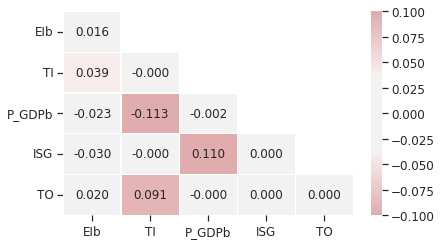

In [18]:
plot_corr_resid(model_path_fit_resid)
# save_fig('updated_correlation_residuals.pdf')


Call:
lm(formula = data.logdiff$EIb ~ resid)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0024363 -0.0004655  0.0001039  0.0007077  0.0017855 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0297131  0.0002239  -132.7   <2e-16 ***
resid        0.9985802  0.0090977   109.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001097 on 22 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9982,	Adjusted R-squared:  0.9981 
F-statistic: 1.205e+04 on 1 and 22 DF,  p-value: < 2.2e-16


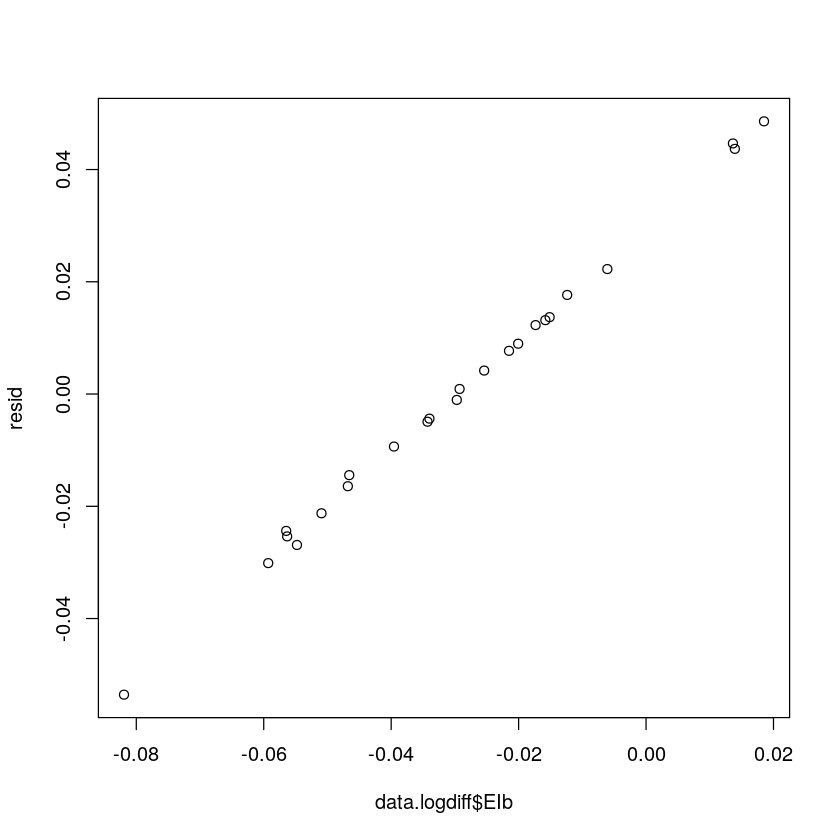

In [19]:
resid <- residuals_lavaan(model.path.fit)$EIb
fitted <- fitted_lavaan(model.path.fit)$EIb
resid <- data.logdiff$EIb - fitted
summary(lm(data.logdiff$EIb ~ resid))
plot(data.logdiff$EIb, resid)